<a href="https://colab.research.google.com/github/htb4hv/assignment2/blob/main/ayush_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.

In [1]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 5.47 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [11]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn is easy to use for kernel density plots.

#note: the file path was for the data requires '/content/assignment2/' before the given file path on my end.

#cleaning numerical variable.

df = pd.read_csv('/content/assignment2/data/airbnb_hw.csv', low_memory=False)
print(df.head())
print(df.shape)
print(df['Price'].unique())
df['Price'] = df['Price'].str.replace(',','').astype(float)
print(df['Price'].unique())
missing_values_count = df['Price'].isnull().sum()
print(missing_values_count)

#cleaning the categorical variable

df = pd.read_csv('/content/assignment2/data/sharks.csv', low_memory=False)
print(df.head())
print(df.shape)
print(df['Type'].unique())
#the categories "boating" "boat" and "boatomg" can be all consolidated to simply stand as Watercraft and the other categories seem fine.
df['Type'] = df['Type'].replace({
    'Boating': 'Watercraft',
    'Boat': 'Watercraft',
    'Boatomg': 'Watercraft'
})
print(df['Type'].unique())

#cleaning the pretrial data #find the right pretrail file
#3
df = pd.read_csv('/content/assignment2/data/VirginiaPretrialData2017.csv', low_memory=False)
print(df.head())
print(df.shape)
print(df['WhetherDefendantWasReleasedPretrial'].unique())
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(df['WhetherDefendantWasReleasedPretrial'].unique())


#4. (Utilized ChatGPT to figure out how the exact df.loc command works when working with two variables and also the fillna command).
print(df['ImposedSentenceAllChargeInContactEvent'].unique())
# For 'Probation/no incarceration' fill the appropirate data rows with 0.
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'].fillna(0)

# For 'Jail up to 12 months' use the median value for the 'SentenceTypeAllChargesAtConvictionInContactEvent' == 1 to fill the not a number values in the respective'ImposedSentenceAllChargeInContactEvent' rows.
median_jail = df[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1]['ImposedSentenceAllChargeInContactEvent'].median()
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1, 'ImposedSentenceAllChargeInContactEvent'] = df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1, 'ImposedSentenceAllChargeInContactEvent'].fillna(median_jail)

# For 'Prison (one year or more)' use the median value for the 'SentenceTypeAllChargesAtConvictionInContactEvent' == 2 to fill the not a number values in the respective 'ImposedSentenceAllChargeInContactEvent' rows.
median_prison = df[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 2]['ImposedSentenceAllChargeInContactEvent'].median()
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 2, 'ImposedSentenceAllChargeInContactEvent'] = df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 2, 'ImposedSentenceAllChargeInContactEvent'].fillna(median_prison)

# For all other categories replace it with a nan.
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]), 'ImposedSentenceAllChargeInContactEvent'] = np.nan

print(df['ImposedSentenceAllChargeInContactEvent'].unique())

#Explanation of my decisions.
# If someone is in probation or no incarceration, then they should be serving no time in jail so the missing values are replaced with 0.
#Since the median is less influenced by outliers or extreme values than the mean, for the prision up to 12 months and more than a year categories,
#their respective median is used to fill the missing values.
#For all other categories that are labeled "Other" or "non applicable", it hard to draw any clear decisions or statisitc since they missing specific information
#so those are just replaced with np.nan for the data cleaning process.


    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


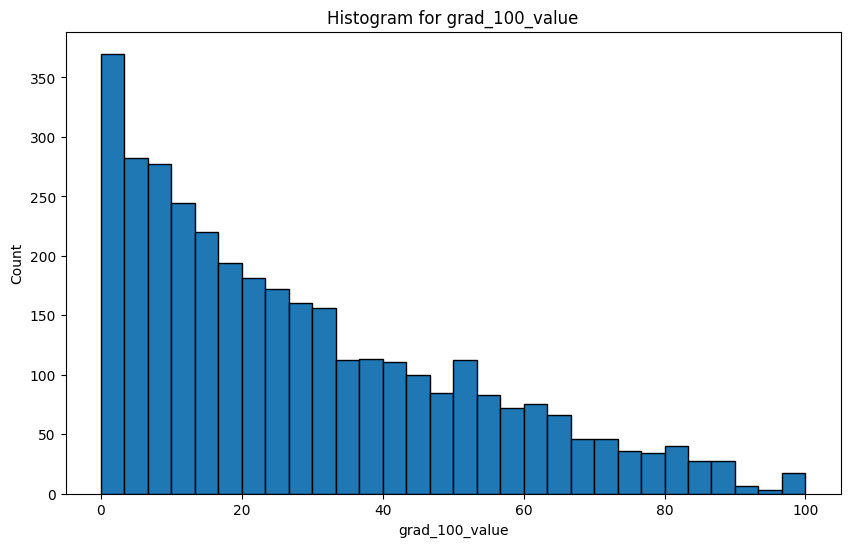

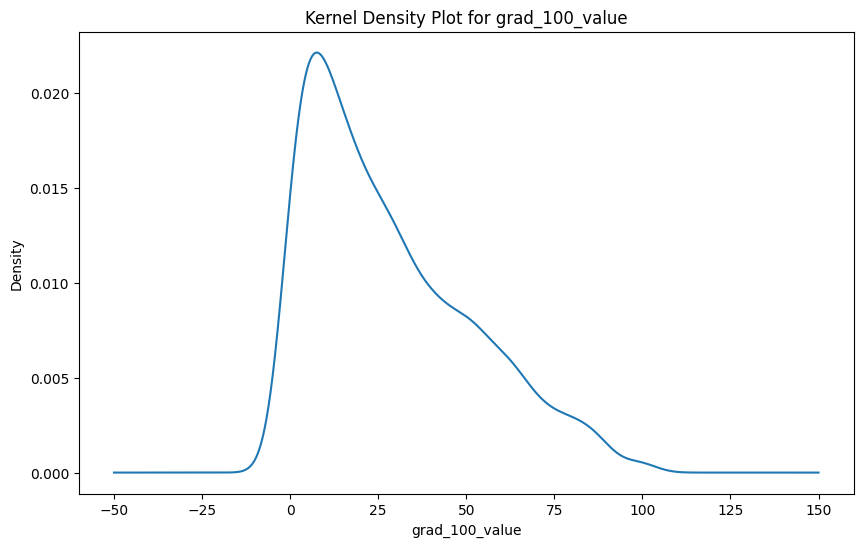

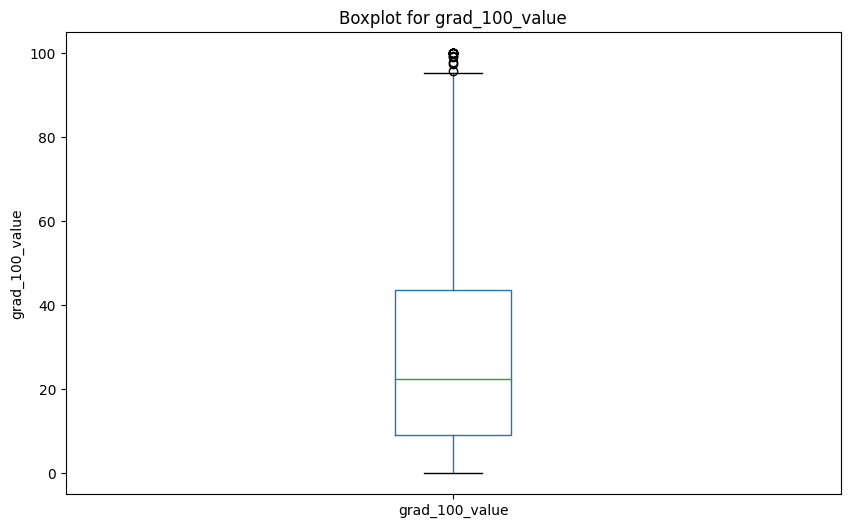

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


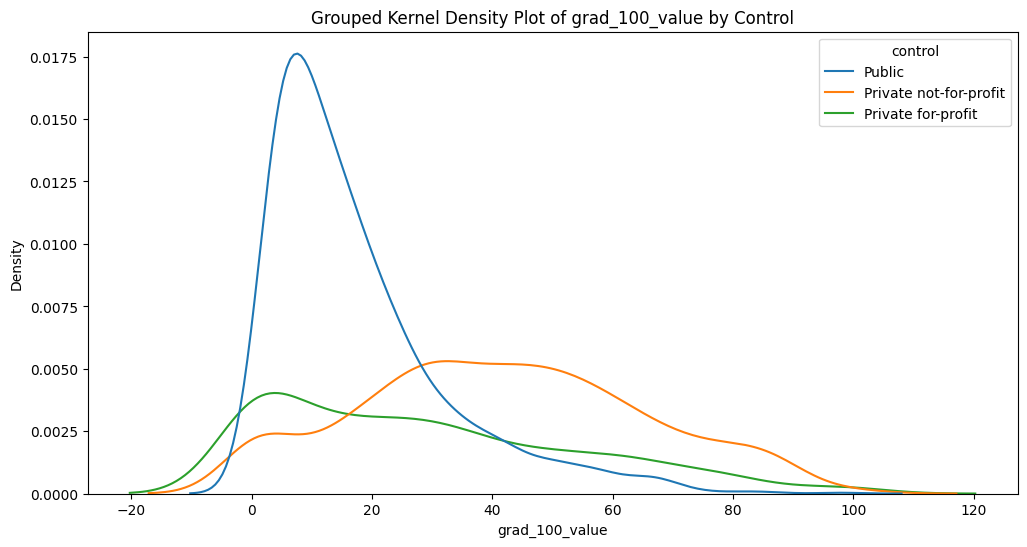

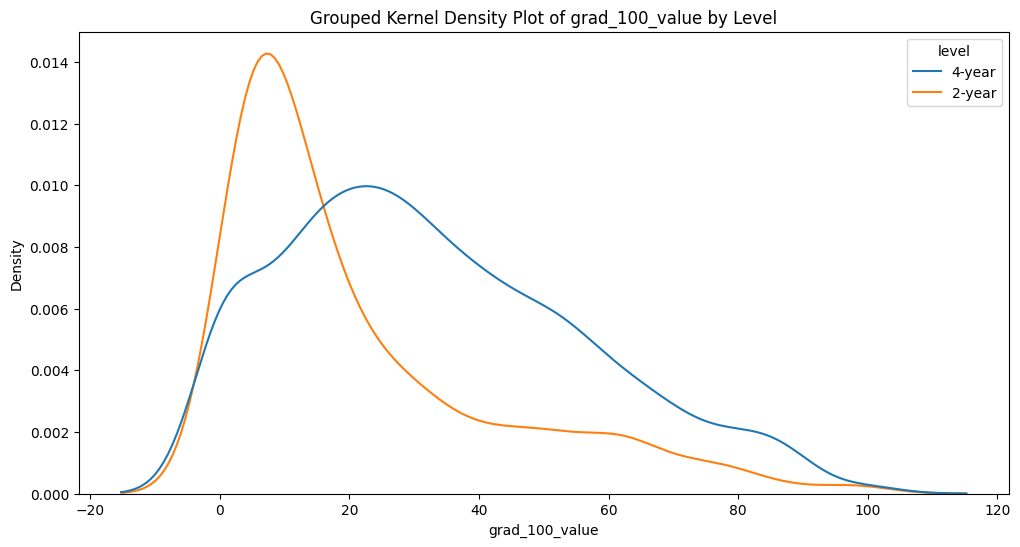

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


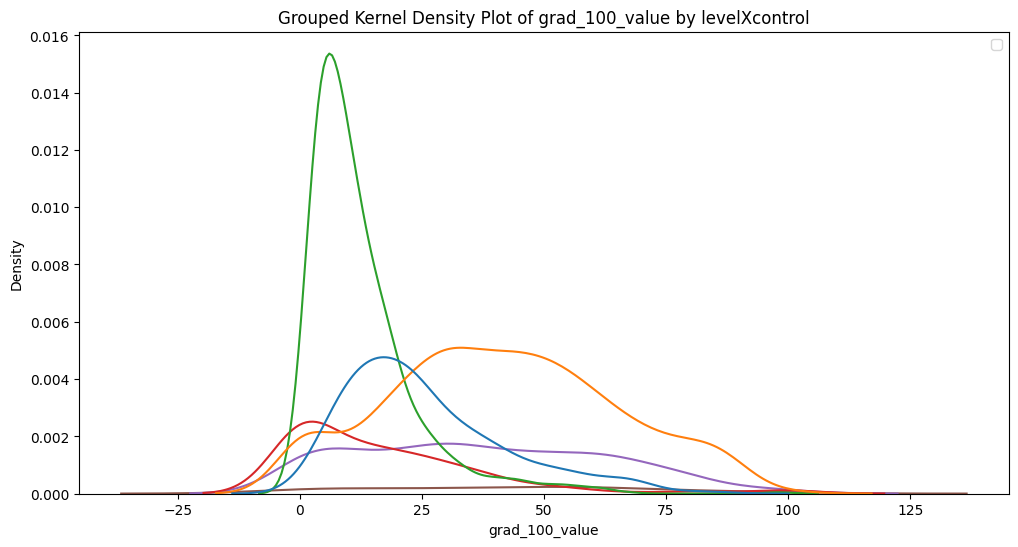

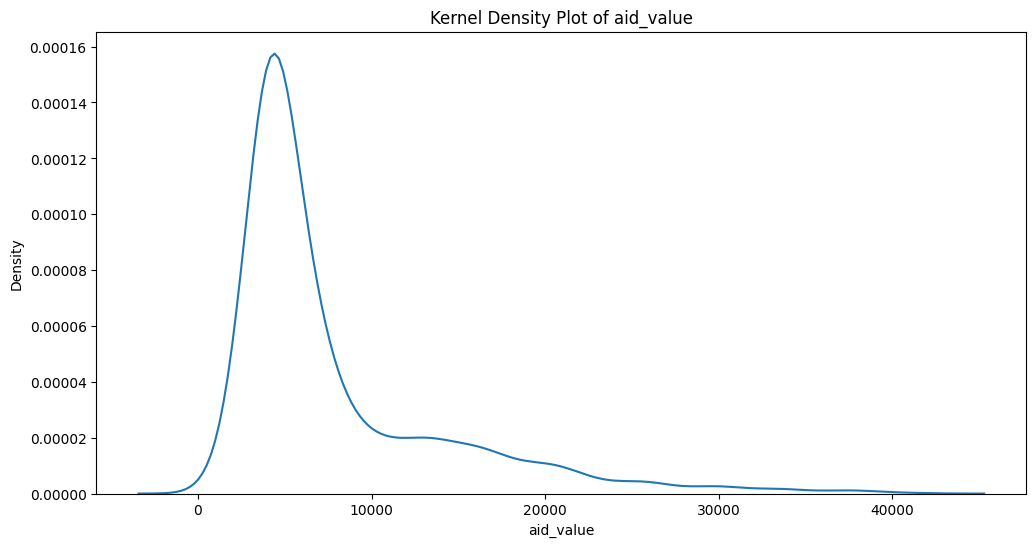

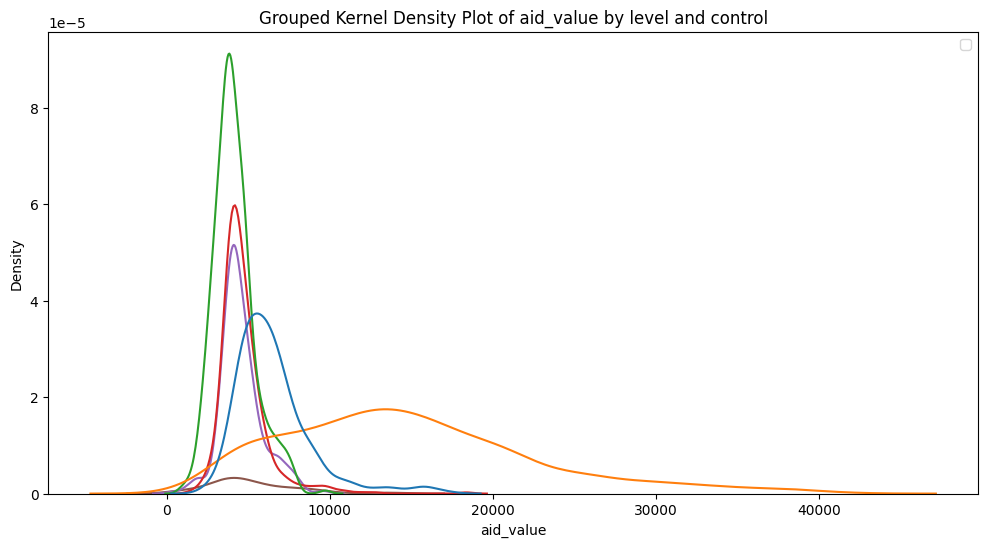

                                 count          mean          std     min  \
levelXcontrol                                                               
2-year, Private for-profit       464.0   4559.681034  1286.688269   294.0   
2-year, Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
2-year, Public                   926.0   4126.199784  1260.271382   881.0   
4-year, Private for-profit       527.0   4696.062619  1489.410020  1580.0   
4-year, Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
4-year, Public                   632.0   6514.071203  2353.716693  2232.0   

                                    25%      50%       75%      max  
levelXcontrol                                                        
2-year, Private for-profit      3818.75   4286.5   5122.00   9727.0  
2-year, Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year, Public                  3311.25   3943.5   4762.00   9809.0  
4-year, Private for-profit      3

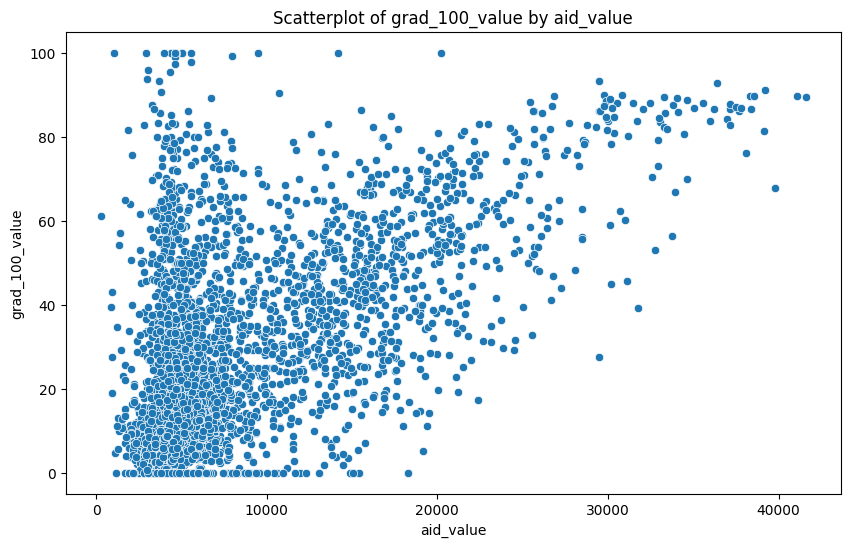

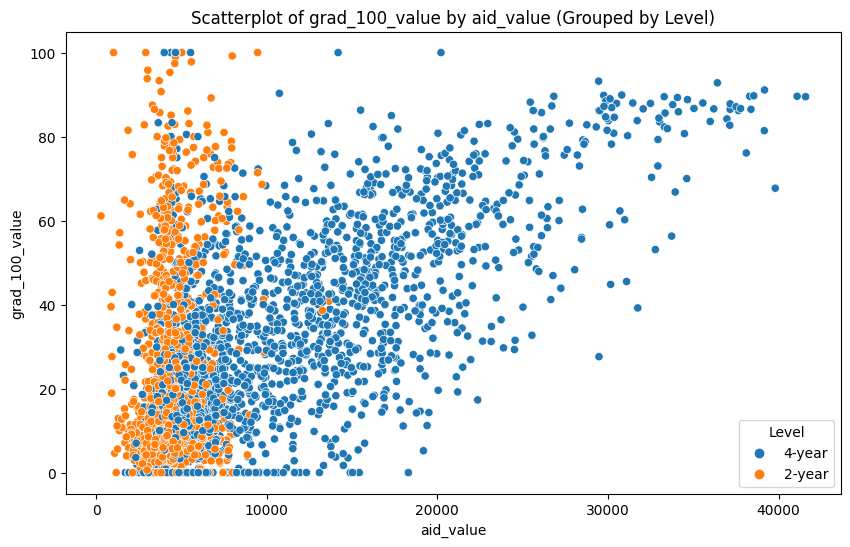

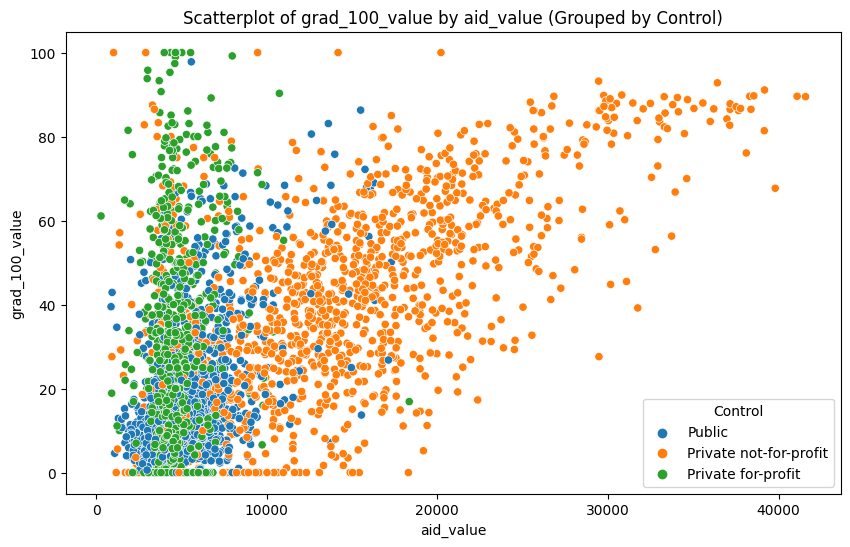

In [ ]:
#Question 3.
df = pd.read_csv('/content/assignment2/data/college_completion.csv', low_memory=False)
#print(df.head())
#print(df.shape)
#There are 3798 rows and 63 columns.
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

#discovered patterns: majority of 2-year institutions are "Public" whereas majority of 4-year institutions are "Private-not-for-profit"
# private not-for-profit are more skewed towards 4-year programs with a smaller number of 2-year institutions whereas private for-profit is evenly distributed between 2-year and 4-year institution.

#Histogram
plt.figure(figsize=(10, 6))
df['grad_100_value'].hist(bins=30, edgecolor='black')
plt.title('Histogram for grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Count')
plt.grid(False)
plt.show()

#kernel density plot
plt.figure(figsize=(10, 6))
df['grad_100_value'].plot(kind='kde')
plt.title('Kernel Density Plot for grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.grid(False)
plt.show()

#boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='grad_100_value')
plt.title('Boxplot for grad_100_value')
plt.ylabel('grad_100_value')
plt.grid(False)
plt.show()

#statistical description:
print(df['grad_100_value'].describe())


#group by control
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="grad_100_value", hue="control")
plt.title('Grouped Kernel Density Plot of grad_100_value by Control')
plt.show()

#group by level
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="grad_100_value", hue="level")
plt.title('Grouped Kernel Density Plot of grad_100_value by Level')
plt.show()

#statistics
# By Control
desc_control = df.groupby('control')['grad_100_value'].describe()
print(desc_control)

# By Level
desc_level = df.groupby('level')['grad_100_value'].describe()
print(desc_level)


#private not-for-profit and 4 year institutions seem to have the best graduation rates.


#part 6
df['levelXcontrol'] = df['level'] + ', ' + df['control']
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="grad_100_value", hue="levelXcontrol")
plt.title('Grouped Kernel Density Plot of grad_100_value by levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

#2 year public as shown by significant peak and 4 year private not-for-profit seem to have the best graduation rates.

#Part 7
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="aid_value")
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="aid_value", hue="levelXcontrol")
plt.title('Grouped Kernel Density Plot of aid_value by level and control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

desc_aid = df.groupby('levelXcontrol')['aid_value'].describe()
print(desc_aid)

"""The two categories that stand out the most in terms of aid values are 2 year institutions (with an average aid value of approximately 4126.2) and 4 year Private not for profit institutions (with an average aid value of around 14702.4).

These two groups potentially contribute to the presence of two peaks or modes, in the distribution of aid values resulting in a graph that may appear to have two prominent clusters."""


#Part 8
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value")
plt.title('Scatterplot of grad_100_value by aid_value')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()

#scatter plot by Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level")
plt.title('Scatterplot of grad_100_value by aid_value (Grouped by Level)')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.legend(title='Level')
plt.show()

#scatter plot by control
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.title('Scatterplot of grad_100_value by aid_value (Grouped by Control)')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.legend(title='Control')
plt.show()

#For 4 year, private for-non-profit institutions, aid seems to increase graduation rates.



**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_NYC.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.